In [1]:
import pandas as pd
df= pd.read_csv("prediksi_pengunjung_borobudur.csv")
df

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
0,weekend,hujan,29.1,ya,86.8,37158
1,weekday,kemarau,22.3,tidak,98.9,25140
2,weekday,kemarau,29.4,ya,71.9,43760
3,weekend,kemarau,30.4,tidak,99.9,32368
4,weekday,kemarau,22.6,tidak,83.3,21171
...,...,...,...,...,...,...
295,weekday,hujan,26.9,ya,98.5,26379
296,weekday,kemarau,33.5,ya,93.0,32794
297,weekday,kemarau,24.8,tidak,85.7,21562
298,weekend,kemarau,25.6,tidak,78.4,31919


In [2]:
df.head()

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
0,weekend,hujan,29.1,ya,86.8,37158
1,weekday,kemarau,22.3,tidak,98.9,25140
2,weekday,kemarau,29.4,ya,71.9,43760
3,weekend,kemarau,30.4,tidak,99.9,32368
4,weekday,kemarau,22.6,tidak,83.3,21171


In [3]:
df.tail()

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
295,weekday,hujan,26.9,ya,98.5,26379
296,weekday,kemarau,33.5,ya,93.0,32794
297,weekday,kemarau,24.8,tidak,85.7,21562
298,weekend,kemarau,25.6,tidak,78.4,31919
299,weekday,kemarau,25.0,tidak,52.6,26931


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hari_type          300 non-null    object 
 1   musim              300 non-null    object 
 2   suhu_rata_rata     300 non-null    float64
 3   ada_event_budaya   300 non-null    object 
 4   harga_tiket_ribu   300 non-null    float64
 5   jumlah_pengunjung  300 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


In [7]:
df.dtypes

hari_type             object
musim                 object
suhu_rata_rata       float64
ada_event_budaya      object
harga_tiket_ribu     float64
jumlah_pengunjung      int64
dtype: object

In [8]:
df.describe()

,suhu_rata_rata,harga_tiket_ribu,jumlah_pengunjung
count,300.000000,300.000000,300.000000
mean,27.067667,75.008000,24662.236667
std,4.248965,14.608945,7778.132529
min,20.100000,50.200000,10359.000000
25%,23.100000,61.875000,18732.000000
50%,26.800000,74.750000,23313.000000
75%,30.725000,86.725000,29500.750000
max,35.000000,100.000000,50000.000000


In [9]:
df.columns

Index(['hari_type', 'musim', 'suhu_rata_rata', 'ada_event_budaya',
       'harga_tiket_ribu', 'jumlah_pengunjung'],
      dtype='object')

In [10]:
df.shape

(300, 6)

In [11]:
df.isna().sum()

hari_type            0
musim                0
suhu_rata_rata       0
ada_event_budaya     0
harga_tiket_ribu     0
jumlah_pengunjung    0
dtype: int64

In [12]:
df.sample(4)

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
17,weekday,kemarau,32.6,tidak,55.6,31042
271,weekend,kemarau,21.3,tidak,89.8,23305
9,weekday,hujan,22.2,tidak,93.5,12431
298,weekend,kemarau,25.6,tidak,78.4,31919


In [31]:
df.duplicated().sum()

np.int64(0)

In [33]:
df["hari_type"].value_counts()

hari_type
weekday    209
weekend     91
Name: count, dtype: int64

In [34]:
df["musim"].value_counts()

musim
kemarau    172
hujan      128
Name: count, dtype: int64

In [35]:
df["ada_event_budaya"].value_counts()

ada_event_budaya
tidak    267
ya        33
Name: count, dtype: int64

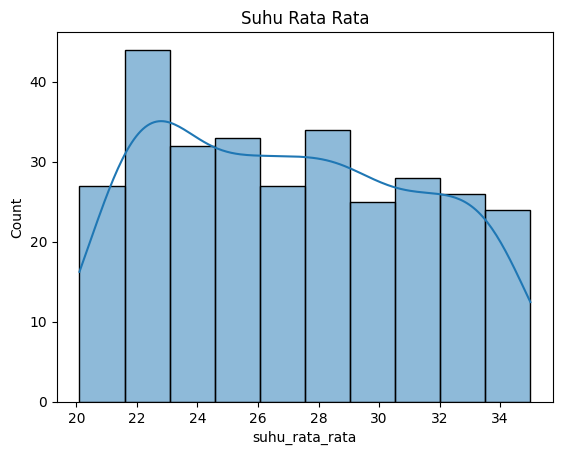

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot (df["suhu_rata_rata"], kde=True)
plt.title("Suhu Rata Rata")
plt.show()

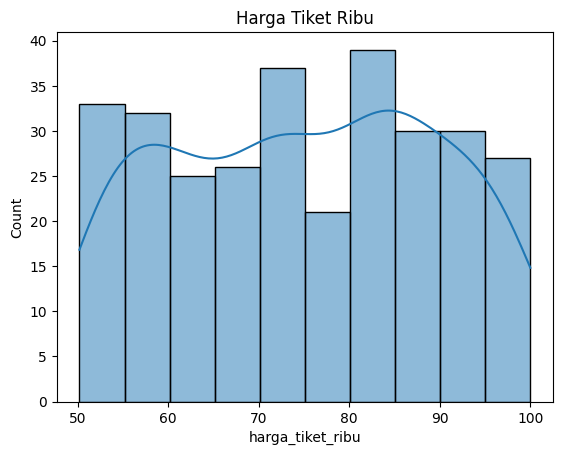

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot (df["harga_tiket_ribu"], kde=True)
plt.title("Harga Tiket Ribu")
plt.show()

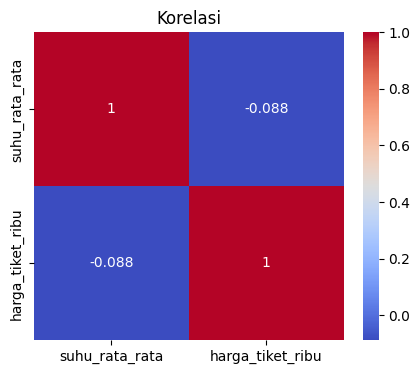

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
kolom_angka=['suhu_rata_rata', 'harga_tiket_ribu']

plt.figure(figsize=(5,4))
sns.heatmap (df[kolom_angka].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi")
plt.show()

In [58]:
from sklearn. linear_model import LinearRegression
from sklearn. model_selection import train_test_split
from sklearn. metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn. preprocessing import StandardScaler, OneHotEncoder
from sklearn. pipeline import Pipeline
from sklearn. compose import ColumnTransformer

X = df[["hari_type", "musim", "suhu_rata_rata", "ada_event_budaya", "harga_tiket_ribu" ]]
y= df["jumlah_pengunjung"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns=["suhu_rata_rata", "harga_tiket_ribu" ]
categorical_columns=["hari_type", "musim", "ada_event_budaya"]

preprocessing = ColumnTransformer(
    transformers = [
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model = pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE Score:", mean_absolute_error(y_test, y_pred))
print("MSE Score:", mean_squared_error(y_test, y_pred))


R2 Score: 0.7660968076281232
MAE Score: 2656.409625940078
MSE Score: 10542360.105586698


In [59]:
from sklearn. ensemble import RandomForestRegressor
from sklearn. model_selection import train_test_split
from sklearn. metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn. preprocessing import StandardScaler, OneHotEncoder
from sklearn. pipeline import Pipeline
from sklearn. compose import ColumnTransformer

X = df[["hari_type", "musim", "suhu_rata_rata", "ada_event_budaya", "harga_tiket_ribu" ]]
y= df["jumlah_pengunjung"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns=["suhu_rata_rata", "harga_tiket_ribu" ]
categorical_columns=["hari_type", "musim", "ada_event_budaya"]

preprocessing = ColumnTransformer(
    transformers = [
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model_forest = pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", RandomForestRegressor(random_state=42, max_depth=6))
    ]
)
model_forest.fit(X_train, y_train)
y_pred=model_forest.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE Score:", mean_absolute_error(y_test, y_pred))
print("MSE Score:", mean_squared_error(y_test, y_pred))


R2 Score: 0.7696457971632878
MAE Score: 2582.868831460168
MSE Score: 10382401.93951267


In [61]:
from sklearn. tree import DecisionTreeRegressor
from sklearn. model_selection import train_test_split
from sklearn. metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn. preprocessing import StandardScaler, OneHotEncoder
from sklearn. pipeline import Pipeline
from sklearn. compose import ColumnTransformer

X = df[["hari_type", "musim", "suhu_rata_rata", "ada_event_budaya", "harga_tiket_ribu" ]]
y= df["jumlah_pengunjung"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns=["suhu_rata_rata", "harga_tiket_ribu" ]
categorical_columns=["hari_type", "musim", "ada_event_budaya"]

preprocessing = ColumnTransformer(
    transformers = [
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model_tree = pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", DecisionTreeRegressor(random_state=42, max_depth=6))
    ]
)
model_tree.fit(X_train, y_train)
y_pred=model_tree.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE Score:", mean_absolute_error(y_test, y_pred))
print("MSE Score:", mean_squared_error(y_test, y_pred))


R2 Score: 0.7076721764409187
MAE Score: 2861.7251010101013
MSE Score: 13175643.964459144


In [105]:
from sklearn. model_selection import cross_val_score

scores = cross_val_score (model_tree, X_train, y_train, cv=5, scoring="r2")
print("Scores :", scores)
print("\nMean Scores :", scores.mean())

Scores : [0.5698266  0.7270609  0.75731792 0.81246308 0.71203549]

Mean Scores : 0.7157407957597149


In [106]:
data_baru=pd.DataFrame([["weekday", "kemarau", 86.78, "tidak", 96.60]],
                       columns=["hari_type", "musim", "suhu_rata_rata", "ada_event_budaya", "harga_tiket_ribu"])
prediksi=model_tree.predict(data_baru)[0]
print(f"Jumlah Pengujung = {prediksi:.0f}")

Jumlah Pengujung = 20513


In [107]:
import joblib

joblib.dump(model, "model_regresi_borobudur")


['model_regresi_borobudur']